## 1. Background

This notebook is an exploratory analysis of data dimensionality reductiona and data clustering using the Wholesale customer data.

The data is the annual spending in monetary units(m.u.) on diverse product categories.

**Datasource:** https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

**Algorithms used:**

**Dimensionality reduction:** PCA and UMAP

**Clustering:** K-Means and Hierarchical clustering




In [186]:
#importing libraries

import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns
import umap

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
import missingno as msno
%matplotlib inline 


## 2. Data Exploration & Preparation

In [84]:
customer = pd.read_csv('C:/Users/Sunil/Thinkful Data Science Projects/26 Unsupervised learning/Challenge/Wholesale customers data_441.csv')

In [85]:
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [86]:
df = customer.copy()

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [88]:
# drop unnecessary variable
df = df.drop(axis=1, columns=['Channel','Region'])

In [89]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


<AxesSubplot:>

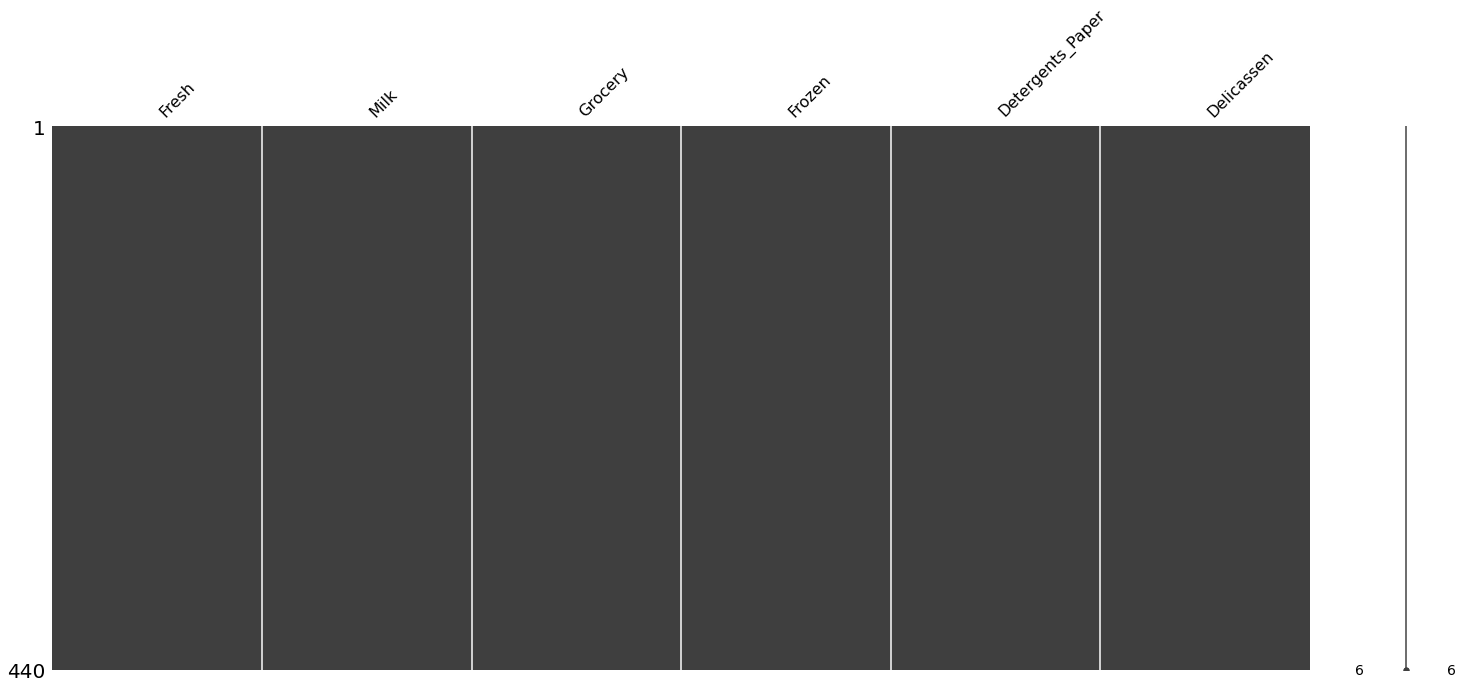

In [90]:
# checking missing values
msno.matrix(df)

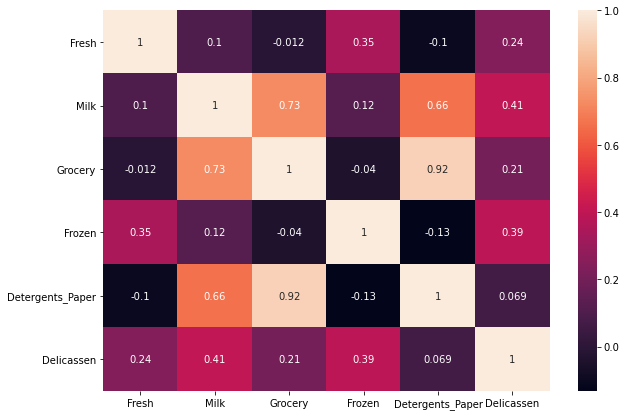

In [91]:
# Visualising data with heatmap
plt.subplots(figsize =(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

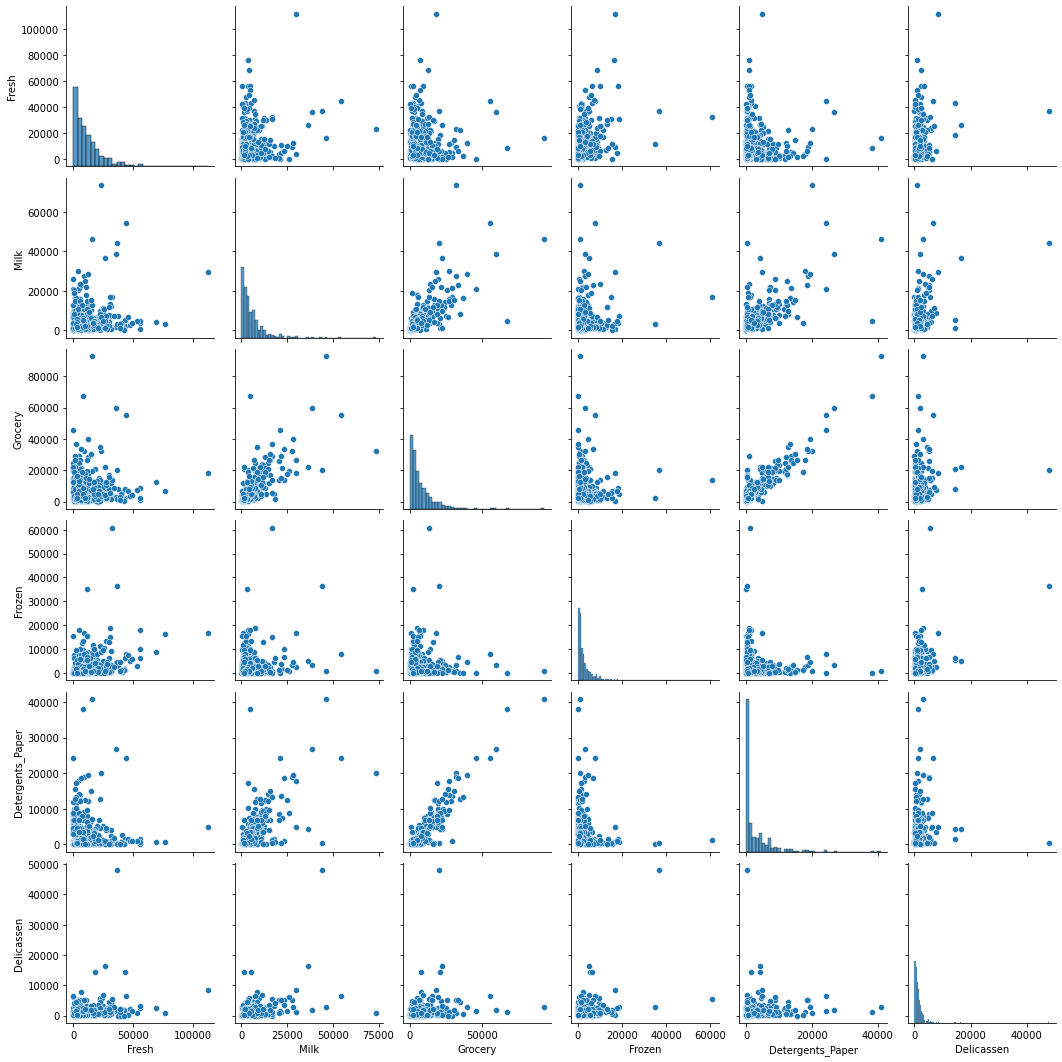

In [92]:
# pairplot to visualise the data distribution
sns.pairplot(df)

# All the variablies are positively skewed

In [93]:
# Log scaling the data 
log_customer = np.log(df)

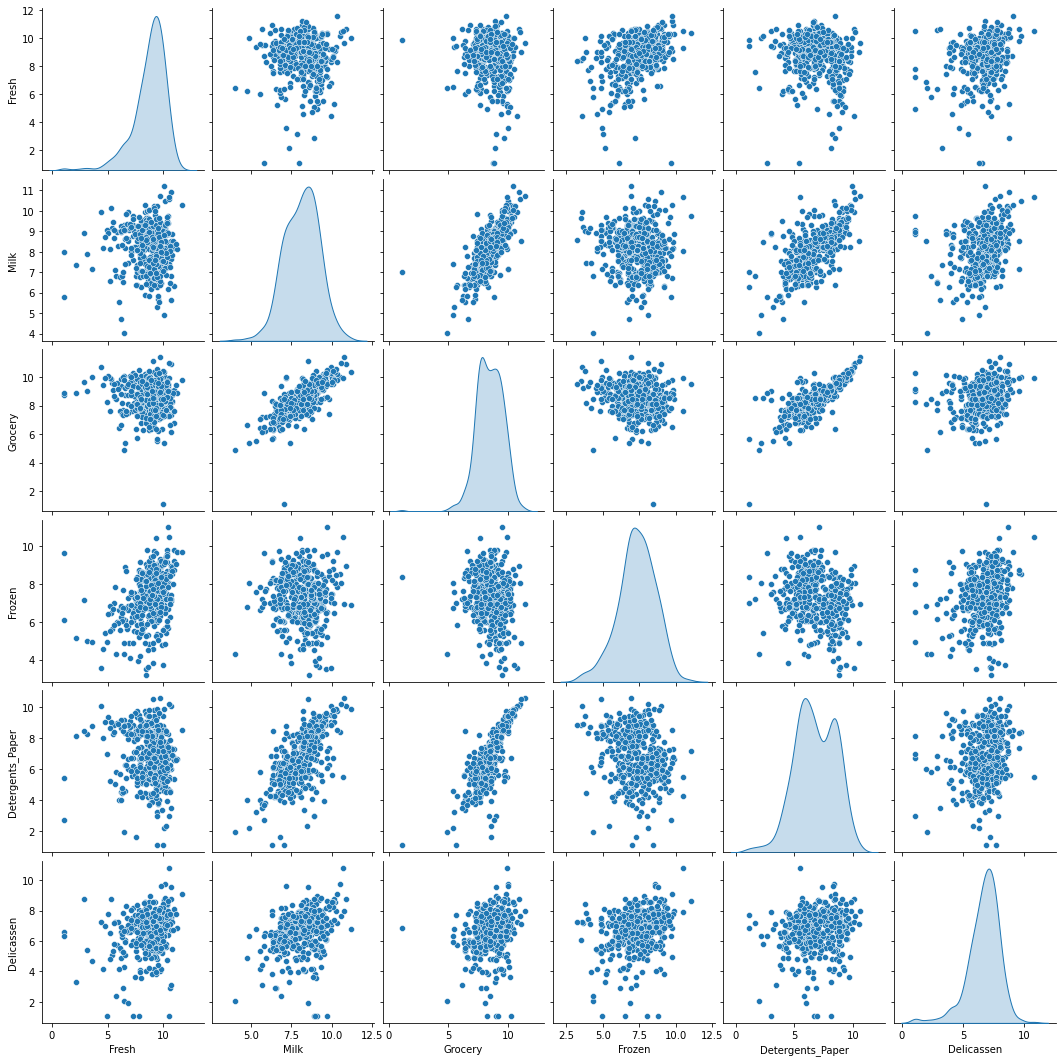

In [94]:
# scatter matrix
sns.pairplot(log_customer, diag_kind='kde')

## 3. Dimensionality reduction

### 3.1 PCA

In [95]:
#dimension = no of variables(use all to see how many of PCs are going to be chosen)
pca = PCA(n_components=6)
pca_customer = pca.fit_transform(log_customer) 
pca_df = pd.DataFrame(data=pca_customer, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])

In [96]:
print(pca_df.head())

       PC 1      PC 2      PC 3      PC 4      PC 5      PC 6
0 -1.750985 -0.070515 -0.911759 -1.726536  0.274093  0.398415
1 -1.800365 -0.869754  0.212831  0.007917  0.118825  0.231431
2 -1.893736 -1.676621  1.318885 -0.485203 -0.373623  0.328400
3  1.127313 -1.457982  0.524745  0.462007 -0.679918 -0.665206
4 -0.796711 -2.460866  0.470580 -0.294928 -0.301594 -0.057471


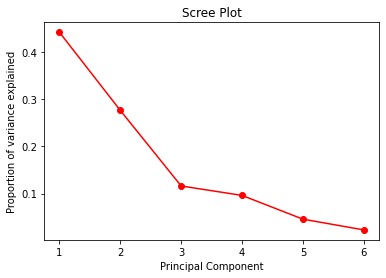

Proportion of Variance Explained: [0.44237417 0.27657107 0.11617342 0.09617719 0.0457568  0.02294735]
Cumulative proportion of the PC: [0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


In [97]:
PC_val = np.arange(pca.n_components_)+1
plt.plot(PC_val, pca.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of variance explained')
plt.show()

# printing the variance ratio
print('Proportion of Variance Explained:', pca.explained_variance_ratio_)

# cumulative summing
out_pca = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative proportion of the PC:', out_pca)


So, from the Scree plot and Cumulative proportion information, to retain 93% of the variance we should choose first four components.

In [196]:
# PCA with component= 2
X = log_customer
y = customer.Channel
pca = PCA(n_components=2)

# fitting the data to pca
pca_components = pca.fit_transform(X)

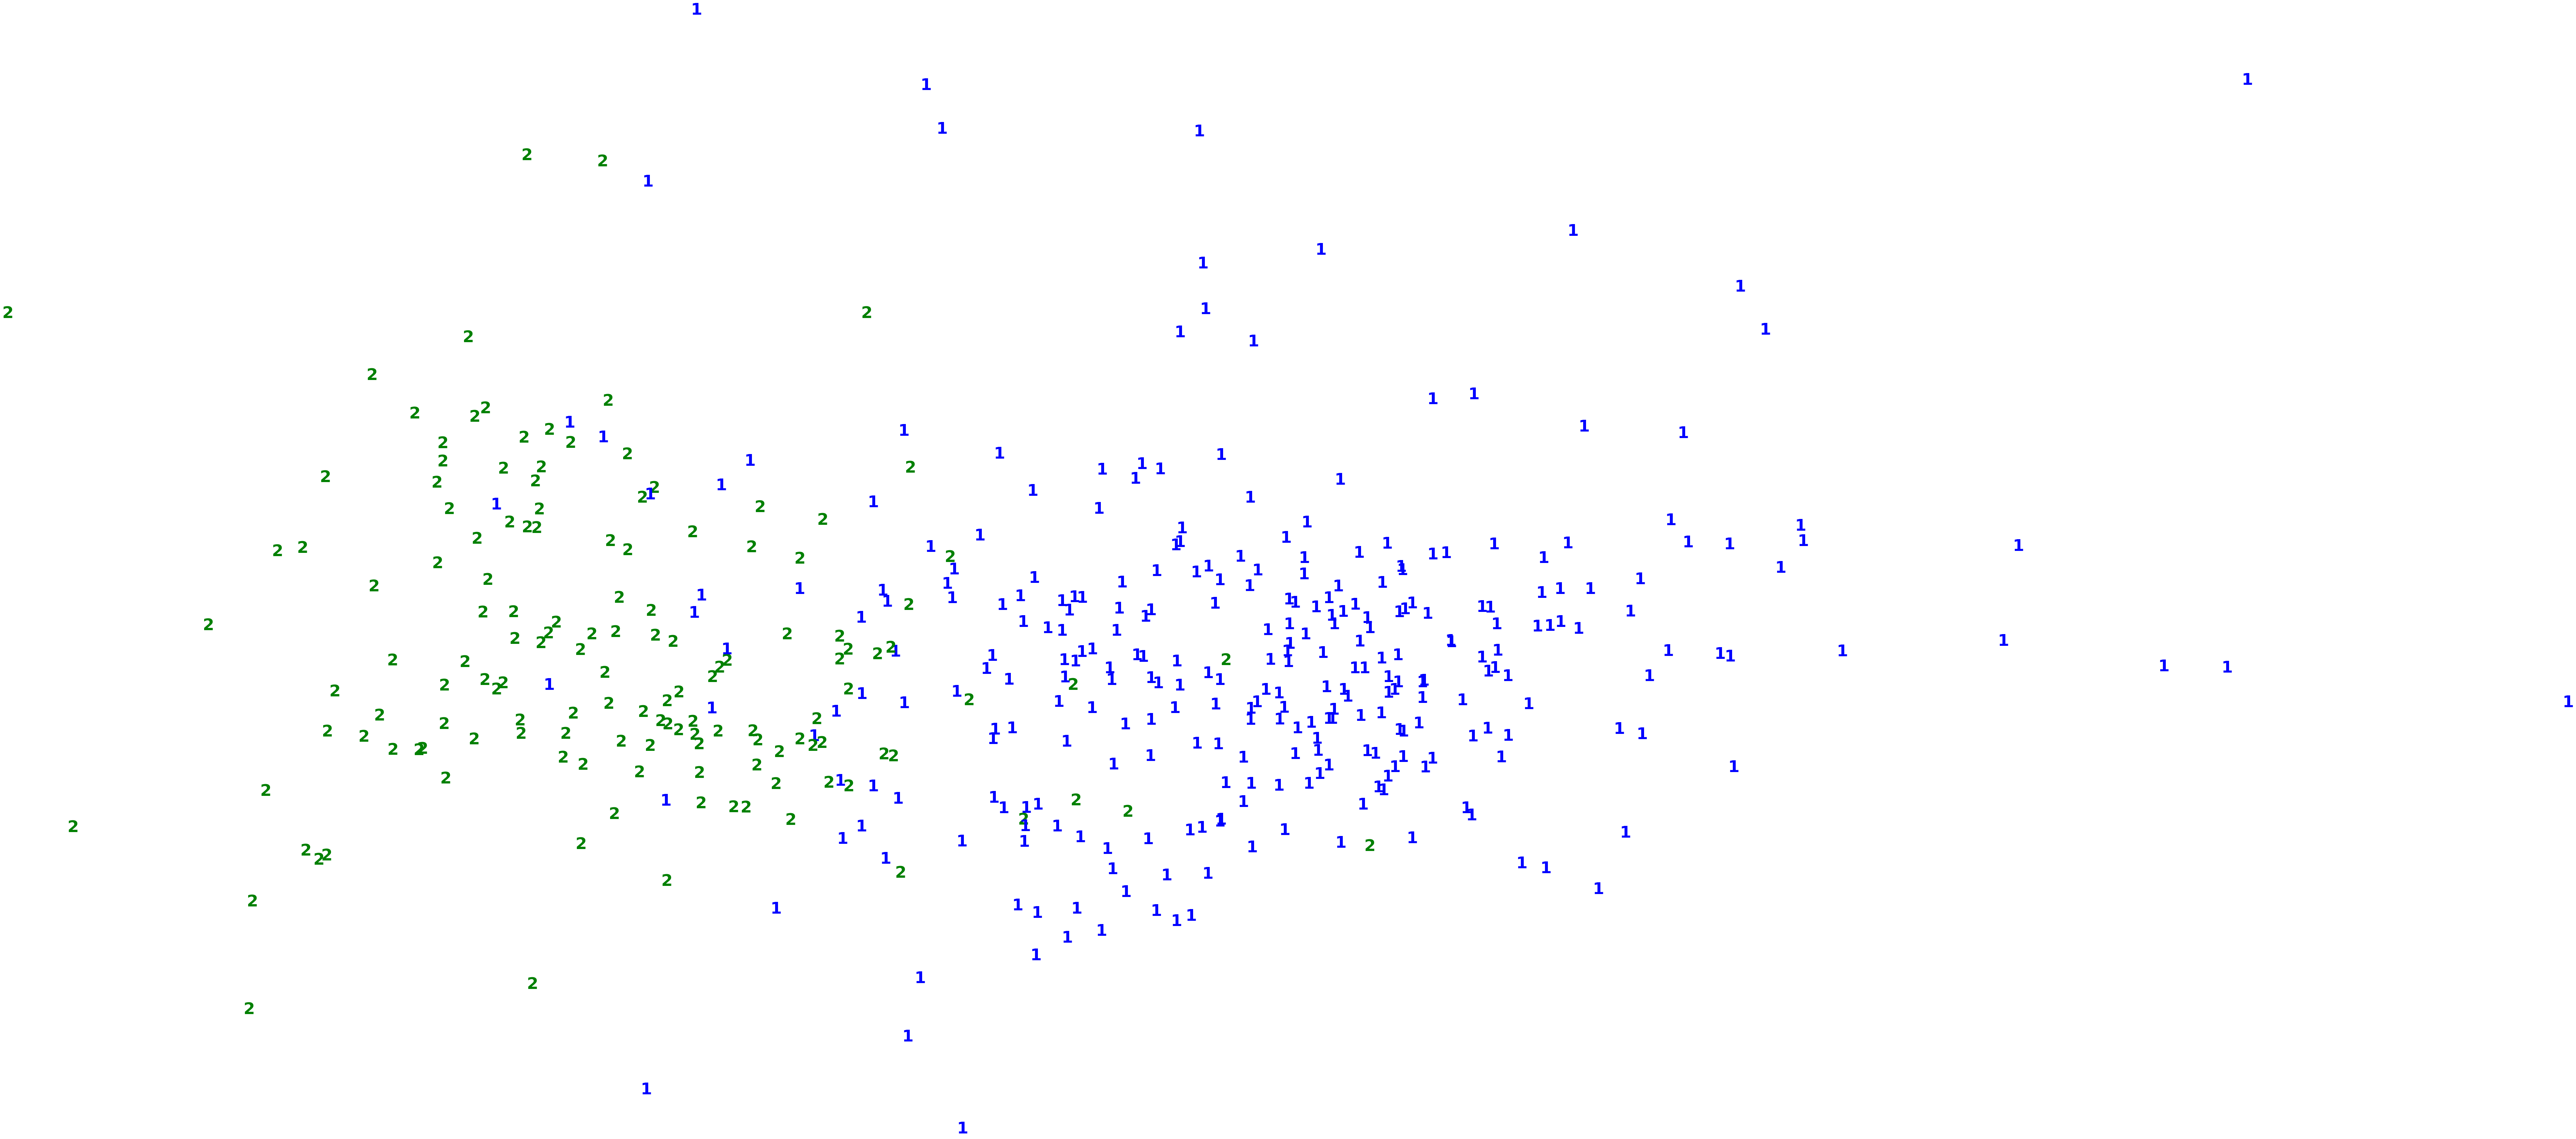

In [197]:
#plotting the results
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### 3.2 UMAP

In [192]:
# DR with UMAP

umap_df = customer.copy()
X = umap_df.iloc[:,2:]
y = umap_df.Channel
print(X.shape, y.shape)


#Apply UMAP to the data
umap_results = umap.UMAP(n_neighbors=6,

                      min_dist=0.3,

                      metric='correlation').fit_transform(X)

(440, 6) (440,)


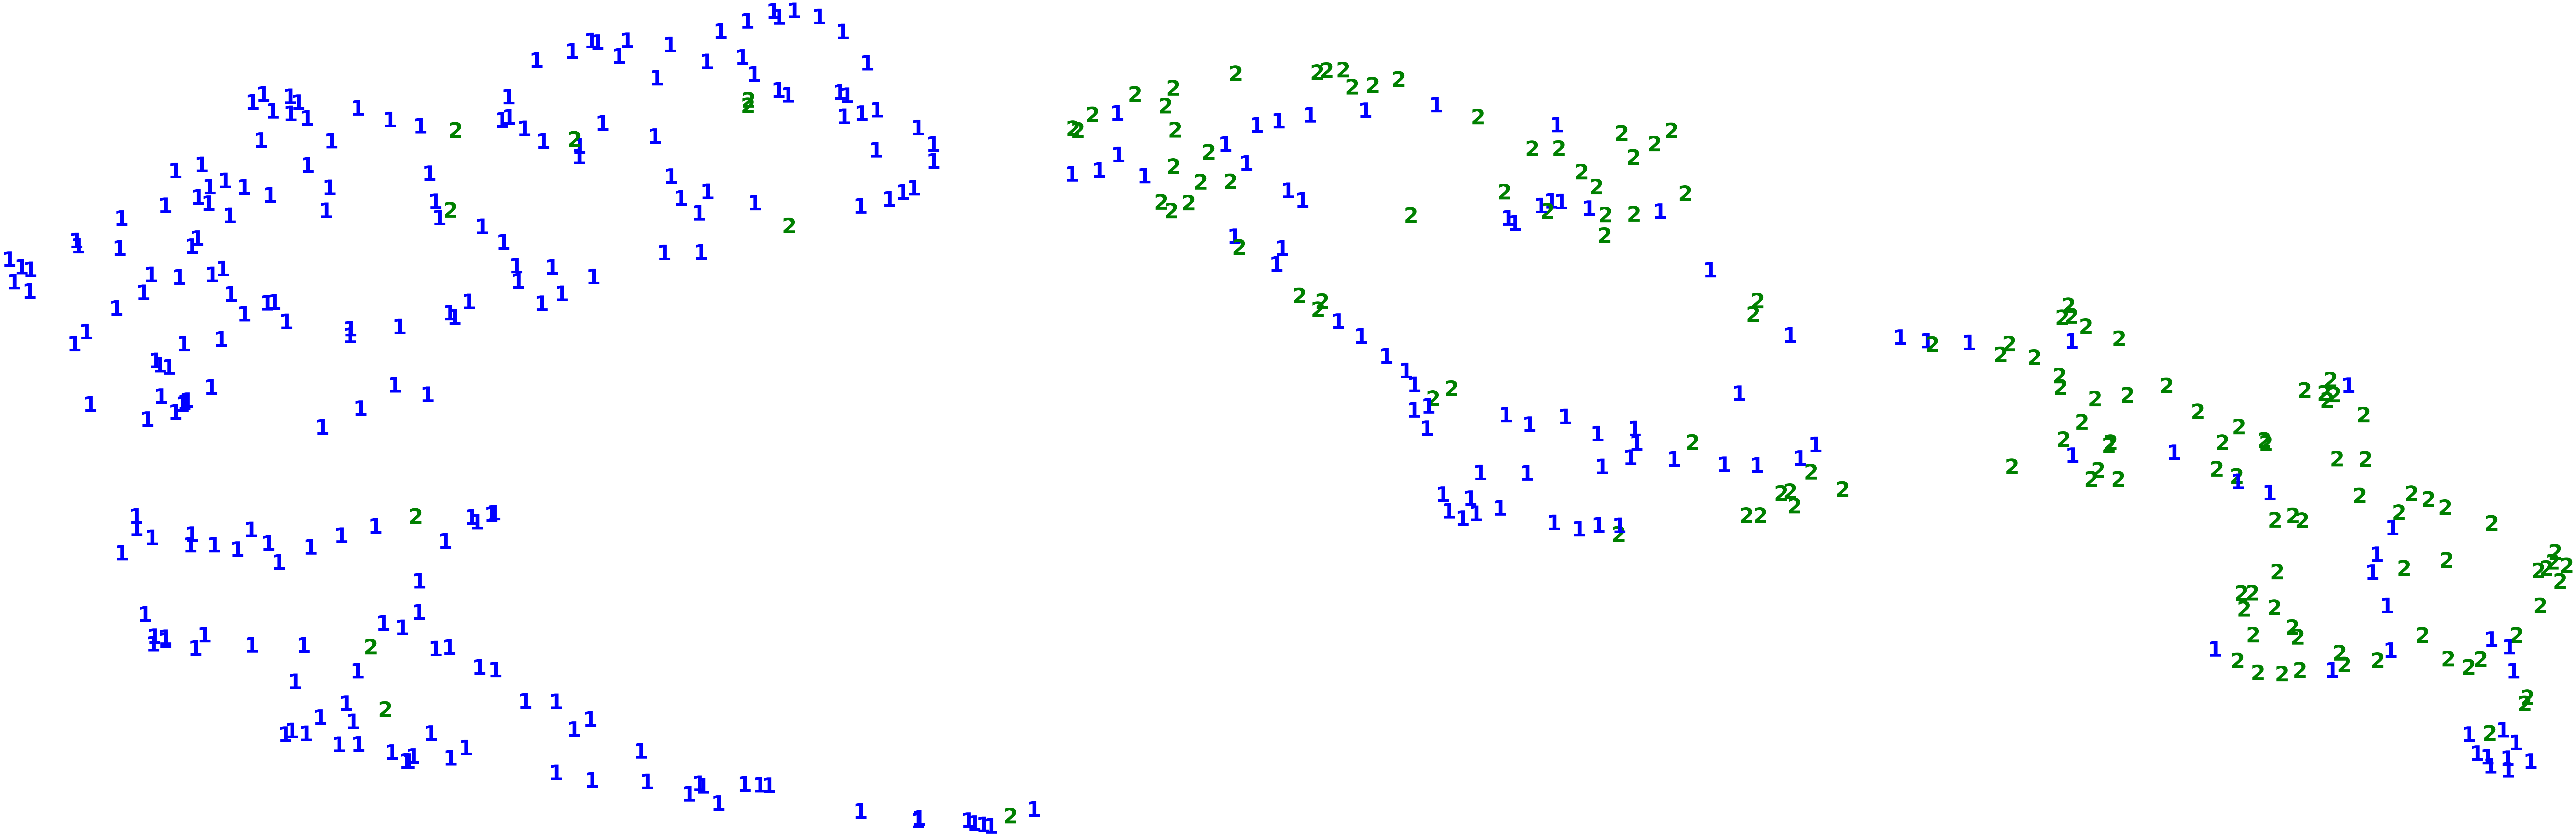

In [193]:
#visualise UMAP results

plt.figure(figsize=(10,5))

colours = ["r","b","g"]

for i in range(umap_results.shape[0]):

    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],

             color=colours[int(y[i])],

             fontdict={'weight': 'bold', 'size': 80}

        )

plt.xticks([])

plt.yticks([])

plt.axis('off')

plt.show()

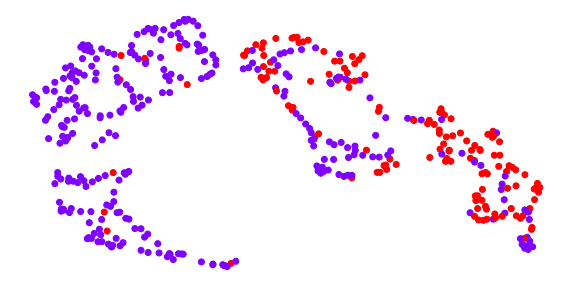

In [199]:
# Two dimensional representation
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1],c = y,cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Comparing PCA and UMAP as a dimensionality reduction methods, UMAP showed better clustering results for visualisation. 

## 4. Clustering

### 4.1 K-Means Clustering

In [203]:
## Kmeans clustering with two PC
X = pca_df[['PC 1', 'PC 2']]

kmeans = KMeans(n_clusters=2, random_state=44)
kmeans.fit(X)
clusters = X.copy() 
clusters['cluster_pred'] = kmeans.fit_predict(X)


Text(0, 0.5, 'PC 2')

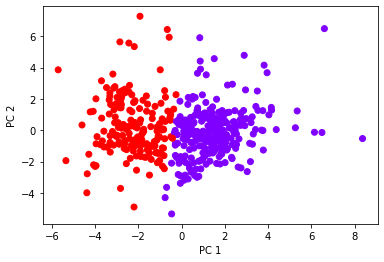

In [204]:
plt.scatter(clusters['PC 1'],clusters['PC 2'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

### 4.2 Hierarchical clustering

In [200]:
# Defining the agglomerative clustering
X = pca_df[['PC 1', 'PC 2', 'PC 3', 'PC 4']]
y = y = customer.Channel
agg_cluster_complete = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)
agg_cluster_avg = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=3)
agg_cluster_ward = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)
# Fit model
clusters_complete = agg_cluster_complete.fit_predict(X)
clusters_avg = agg_cluster_avg.fit_predict(X)
clusters_ward = agg_cluster_ward.fit_predict(X)

In [202]:
print("Adjusted Rand Index of the Agglomerative Clustering solution with complete linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters_complete)))
print("The silhouette score of the Agglomerative Clustering solution with complete linkage: {}"
      .format(metrics.silhouette_score(X, clusters_complete, metric='euclidean')))
print('-'*50)
print("Adjusted Rand Index of the Agglomerative Clustering solution with average linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters_avg)))
print("The silhouette score of the Agglomerative Clustering solution with average linkage: {}"
      .format(metrics.silhouette_score(X, clusters_avg, metric='euclidean')))
print('-'*50)
print("Adjusted Rand Index of the Agglomerative Clustering solution with ward linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters_ward)))
print("The silhouette score of the Agglomerative Clustering solution with ward linkage: {}"
      .format(metrics.silhouette_score(X, clusters_ward, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution with complete linkage: 0.203370125927496
The silhouette score of the Agglomerative Clustering solution with complete linkage: 0.1679675049173951
--------------------------------------------------
Adjusted Rand Index of the Agglomerative Clustering solution with average linkage: 0.4376062157232751
The silhouette score of the Agglomerative Clustering solution with average linkage: 0.04264489943676691
--------------------------------------------------
Adjusted Rand Index of the Agglomerative Clustering solution with ward linkage: 0.342898454615092
The silhouette score of the Agglomerative Clustering solution with ward linkage: 0.20439090770606755


Overall ARI and silhouette score of Ward linkage showed better comapred to other linkage methods.

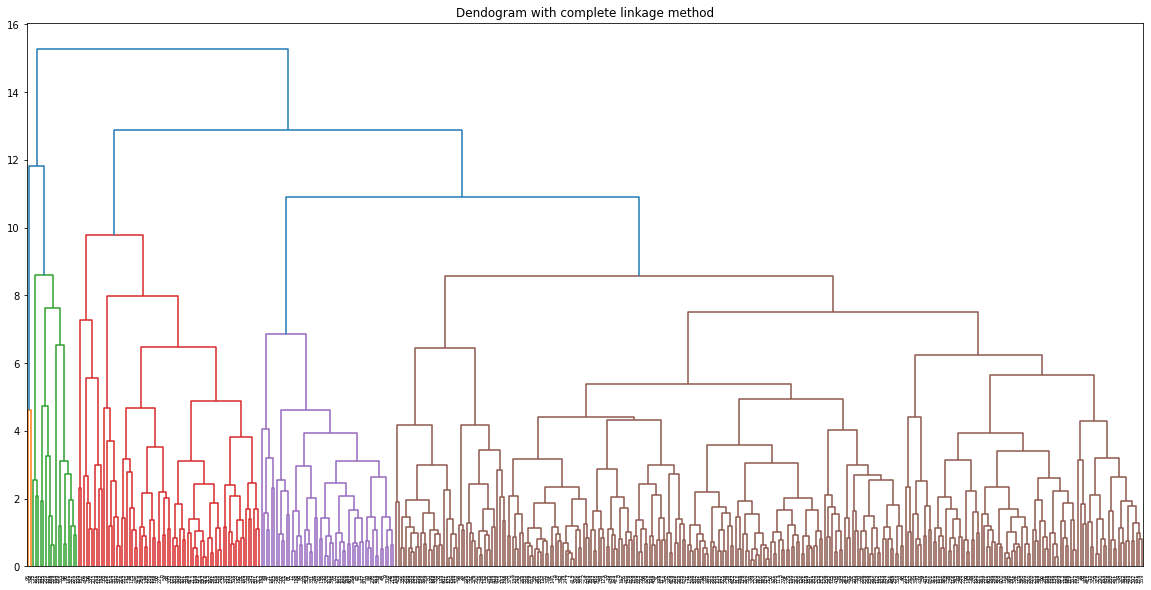

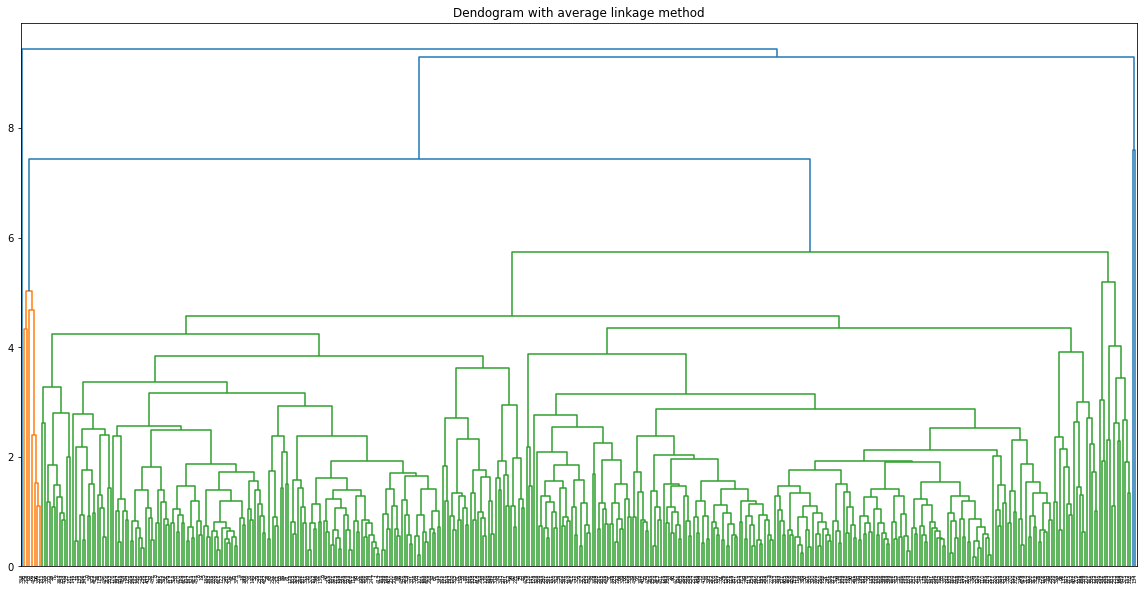

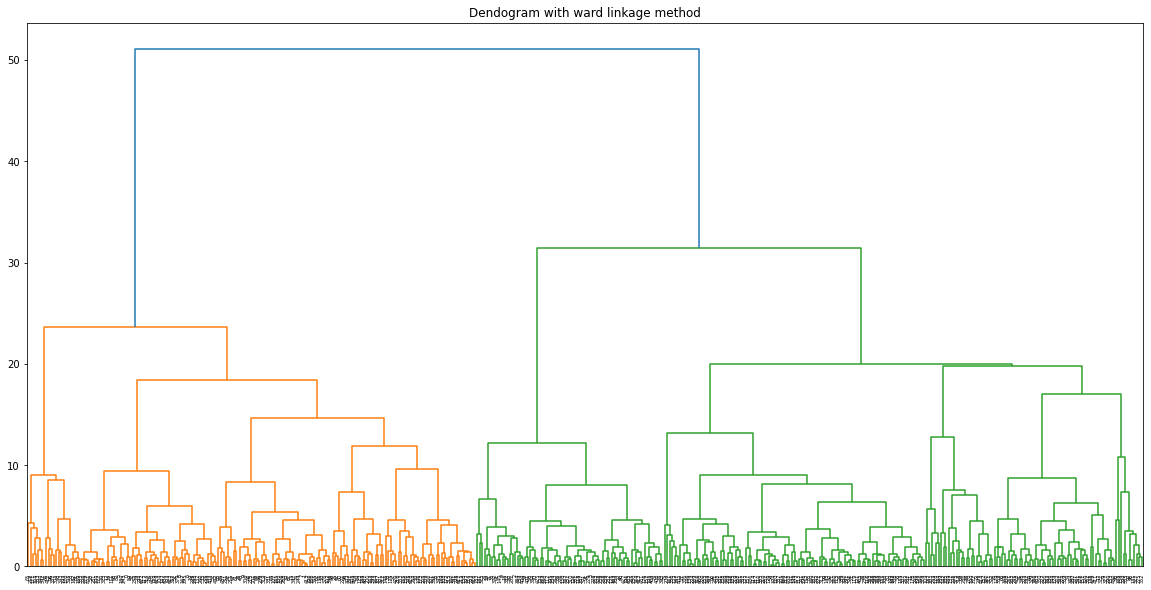

In [201]:
# plotting dendograms
plt.figure(figsize=(20, 10))
plt.title('Dendogram with complete linkage method')
dendrogram(linkage(X, method = 'complete'))
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Dendogram with average linkage method')
dendrogram(linkage(X, method = 'average'))
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Dendogram with ward linkage method')
dendrogram(linkage(X, method = 'ward'))
plt.show()

Ward linkage cleared showed two clusters possible.